<a href="https://colab.research.google.com/github/matheusfcorreia/labs/blob/master/Copy_of_AtividadeAvaliativa1oBimestre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade avaliativa

Leia atentamente as instruções de cada questão, e responda completamente.

Para o inicio da atividade, execute o seguinte trecho de código:


In [0]:
!pip install requests

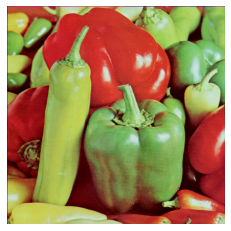

In [0]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import requests
from io import BytesIO

response = requests.get('https://homepages.cae.wisc.edu/~ece533/images/peppers.png')
img = Image.open(BytesIO(response.content)).convert()
plt.imshow(img)
plt.axis('off')
plt.show()

A imagem carregada é uma imagem "clássica" no estudo de processamento de imagem e computação gráfica. Temos a imagem colorida, com isto, podemos começar nossa avaliação.

## Atividade 01

Escreva/Implemente o código que plota a imagem em tons de cinza e o histograma da imagem em tons de cinza.

(array([136641.,      0.,      0.,      0.,   1000.,      0.,      0.,
             0.,      0., 386647.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

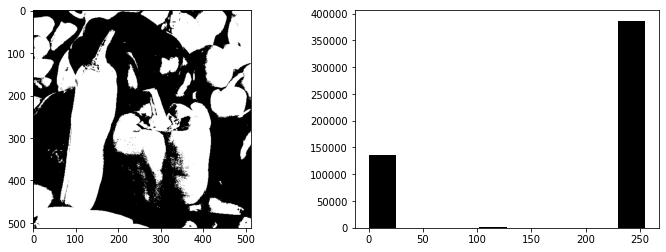

In [0]:

plt.figure(figsize=(12,4))
img_array = np.array(img)
imagem_arr[imagem_arr > 127] = 255
imagem_arr[imagem_arr < 127] = 0 

img_pb = Image.fromarray(imagem_arr)

plt.subplot(121)
plt.imshow(img_pb)

plt.subplot(122)
plt.hist(imagem_arr.ravel(), color='black')


## Atividade 02

Escreva/Implemente o código que plota a imagem em preto e branco e o histograma da imagem em preto e branco.

(array([ 16941.,  13221.,  23695.,  54058.,  29726.,  34765.,  45057.,
         36046.,   8635., 262144.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

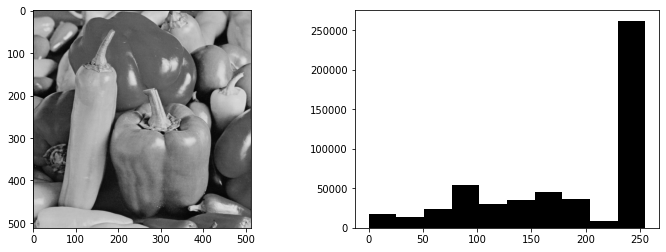

In [0]:
plt.figure(figsize=(12,4))
img = img.convert('LA')
plt.subplot(121)
plt.imshow(img)

imagem_arr = np.array(img)
plt.subplot(122)
plt.hist(imagem_arr.ravel(), color='black')

## Atividade 03

Sobre os histogramas gerados nas atividade 1 e 2, o que podemos concluir? Responda no espaço abaixo.

> Visivelmente, a partir dos histogramas, é possível concluir que a imagem possui mais pontos claros que escuros. Até quando a imagem é apresentada com os dois extremos, 0 e 255, os pontos claros se destacam.

## Atividade 04

Gere duas imagens negativas, uma utilizando a imagem em preto e branco como base, e a outra a imagem em tons de cinza. Plote as imagem no final.

## Atividade 05

Baseado nas imagens acima, o que você destaca?

> Escreva sua resposta aqui

## Atividade 06

Escreva um código que plote o histograma das 3 cores (RGB) separadas.

Baseado no histograma das 3 cores, escreva o que podemos concluir da imagem.

> Escreva sua resposta aqui.

## Atividade 07

Escreva um código que calcule a média dos pixels do canal azul, então, troque todos os valores do canal azul pela média e plote a nova imagem, em versão colorida.

Explique como a imagem da questão 5 foi afetada?

> Escreva sua resposta aqui.